In [1]:
import matplotlib.pyplot as plt
import numpy as np
from TemporalNetwork import ContTempNetwork
import benchmark_methods

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net_heat1 = ContTempNetwork.load('evolving_SBM_net_2activities')

In [3]:
source_nodes = []
target_nodes = []
starting_times = []
ending_times = []

shapshot_size = 1

for i in range(0, int(net_heat1.times[-1]), shapshot_size):
    matrix_snapshot = net_heat1.compute_static_adjacency_matrix(start_time=i, end_time=i+shapshot_size).toarray()
    matrix_snapshot = (matrix_snapshot > 0).astype(int)
    source_nodes_snapshot = np.nonzero(matrix_snapshot)[0]
    target_nodes_snapshot = np.nonzero(matrix_snapshot)[1]
    starting_times_snapshot = [i] * len(source_nodes_snapshot)
    ending_times_snapshot = [i+shapshot_size] * len(source_nodes_snapshot)

    source_nodes += list(source_nodes_snapshot)
    target_nodes += list(target_nodes_snapshot)
    starting_times += starting_times_snapshot
    ending_times += ending_times_snapshot

In [4]:
snapshot_network = ContTempNetwork(source_nodes=source_nodes,
                       target_nodes=target_nodes,
                       starting_times=starting_times,
                       ending_times=ending_times,
                       merge_overlapping_events=True)

PID  72420  :  merged  12115  events
PID  72420  :  merged  0  events


In [5]:
snapshot_network.times

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
      dtype='int64', name='times', length=246)

In [6]:
snapshot_network.compute_laplacian_matrices(random_walk = False, save_adjacencies=True)

In [7]:
# for snap in snapshot_network.adjacencies:
#     plt.matshow(snap.toarray())

# Laplacian Spectrum Similarity

In [8]:
window_length = 6
n_eigen = 6

In [9]:
#zsc, r = benchmark_methods.laplacian_spectrum_similarity(snapshot_network, window_length=window_length, n_eigen=n_eigen)

In [10]:
#plt.plot(snapshot_network.times[window_length // 2 : len(snapshot_network.times) - window_length // 2 -1], zsc)

# NCPD

In [11]:
#d_gamma, t = benchmark_methods.NCPD(snapshot_network.adjacencies, window_length=window_length, n_eigen=n_eigen)

In [12]:
#plt.plot(snapshot_network.times[t], d_gamma)

# CUMSUM

In [13]:
window_length = 30

In [14]:
Y, t = benchmark_methods.CUMSUM(snapshot_network.adjacencies, window_length=window_length)

In [15]:
t

array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
        86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110,
       112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
       138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162,
       164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184])

In [16]:
Y

[15.284079013893377,
 15.505495915559873,
 15.587771679143549,
 15.769791212347288,
 16.275914870716456,
 16.54251993160076,
 16.630151100033295,
 16.76825466074775,
 16.814780556413872,
 16.864505436831127,
 16.983029234386695,
 17.14894931693877,
 17.515065230828014,
 17.81366854656435,
 18.208074621264835,
 18.718912934517146,
 19.37685690819294,
 20.10808472361397,
 20.652302640522116,
 21.06896990349208,
 21.52189334220099,
 21.57393085231415,
 21.388167718084283,
 21.171049947740528,
 20.80145801992019,
 20.370880899647105,
 20.194065267301195,
 19.85783376691519,
 19.6842022363,
 19.51766363389231,
 19.454503579387925,
 19.206733050897295,
 18.95421446367428,
 18.6278497855874,
 18.11569439050401,
 17.6720133792603,
 17.471183361810827,
 17.22495502764014,
 16.82821316685945,
 16.510298569309295,
 16.431232897632086,
 16.280623168728322,
 16.263709921571415,
 16.351208034129016,
 16.222205602217066,
 16.199094606012842,
 16.318158646012016,
 16.45772109549177,
 16.86559739148711

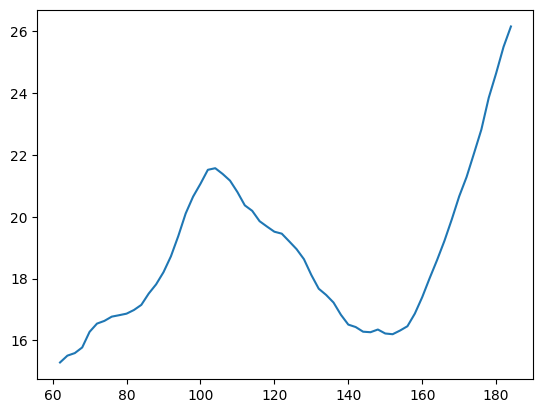

In [17]:
plt.plot(snapshot_network.times[t][1:], Y)

# CUMSUM 2

In [27]:
window_length=6

In [28]:
stat, t = benchmark_methods.CUMSUM_2(snapshot_network.adjacencies, window_length=2*window_length)

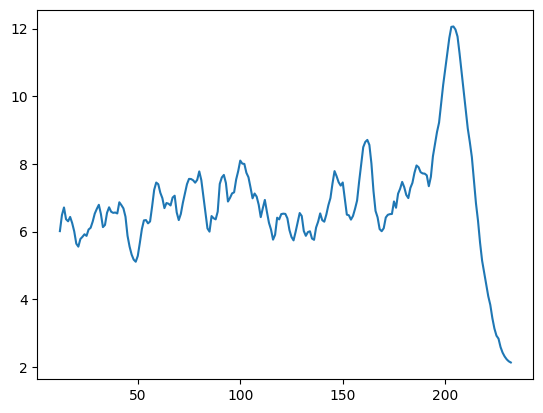

In [29]:
plt.plot(snapshot_network.times[t], stat)

# Average Frobenius Distance

In [30]:
window_length = 10

In [31]:
frob_dist, t_frob = benchmark_methods.avg_frobenius_distance(snapshot_network.adjacencies, window_length=window_length)

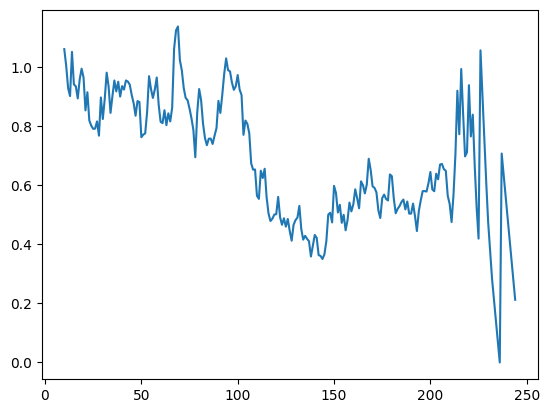

In [32]:
plt.plot(snapshot_network.times[t_frob], frob_dist)

# Avg Proctures Distance

In [24]:
window_length=10

In [25]:
proc_dist, t_proc = benchmark_methods.avg_procrustes_distance(snapshot_network.adjacencies, window_length=window_length)

/compute/skoove/entropy/flow_stability/benchmark_distances.py:143: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(s)


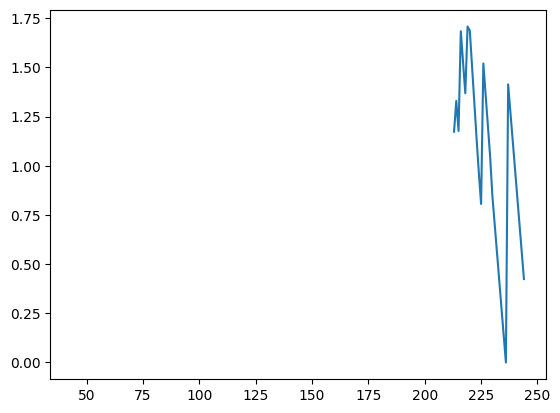

In [26]:
plt.plot(snapshot_network.times[t_proc], proc_dist)